In [28]:
from fileIO import *
from constants import *
import numpy as np
import matplotlib.pyplot as plt

sim1 = CuDiscModel("../outputs/isoPD2D_gas_init")
sim2 = CuDiscModel("../outputs/isoPD_long")

g = sim1.grid
sizes1 = sim1.load_grain_sizes()
gas1, dust1 = sim1.load_all_prim_data()
temp1 = sim1.load_all_temp_data()
ts1 = sim1.load_output_times()
sizes2 = sim2.load_grain_sizes()
gas2, dust2 = sim2.load_all_prim_data()
temp2 = sim2.load_all_temp_data()
ts2 = sim2.load_output_times()

/u/srwmills/cuDisc/codes/python/fileIO.py:134: RuntimeWarning: invalid value encountered in divide
  D = np.log(mass[1:]/mass[:-1])/np.log(size[1:]/size[:-1])


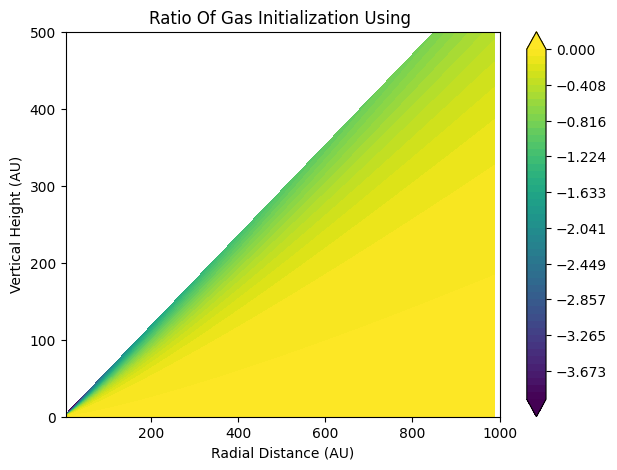

In [29]:
plt.figure(figsize=(7, 5))
plt.contourf(g.R/au, g.Z/au, np.log10(gas1.rho[0,:,:]/gas2.rho[0,:,:]), np.linspace(-4,0,50), extend='both')
plt.xlim(5,1000)
plt.ylim(0,500)
plt.title("Ratio Of Gas Initialization Using ")
plt.xlabel("Radial Distance (AU)")
plt.ylabel("Vertical Height (AU)")
plt.colorbar()

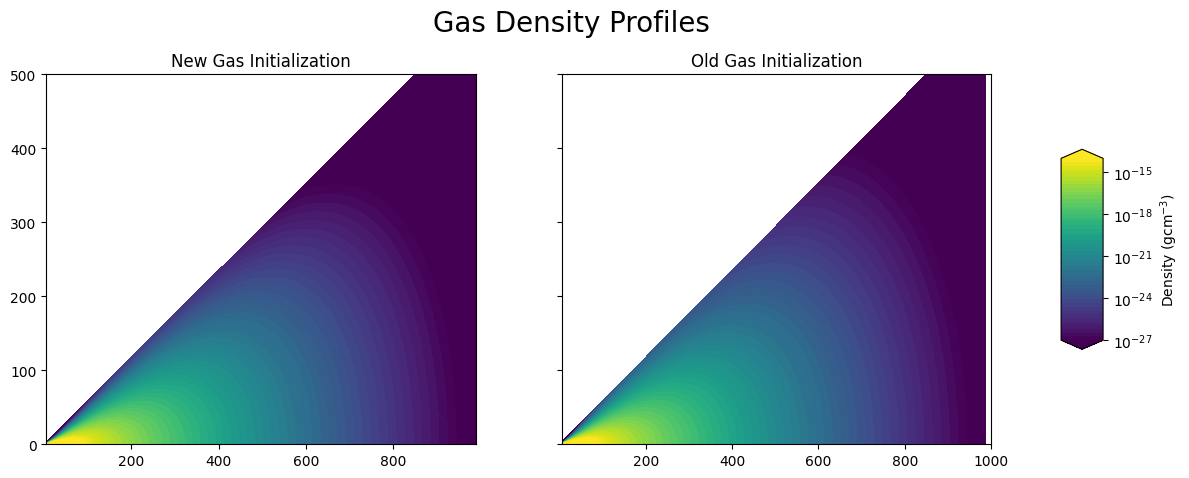

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
cond = ax[0].contourf(g.R/au, g.Z/au, np.log10(gas1.rho[0,:,:]), np.linspace(-27,-14,50), extend='both')
ax[0].set_title("New Gas Initialization")
ax[1].contourf(g.R/au, g.Z/au, np.log10(gas2.rho[0,:,:]), np.linspace(-27,-14,50), extend='both')
ax[1].set_title("Old Gas Initialization")

plt.xlim(5,1000)
plt.ylim(0,500)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.03, 0.4])
cbar = fig.colorbar(cond, cax=cbar_ax)
cbar.set_ticks(np.arange(-27,-12,3))
cbar.set_ticklabels(["$10^{%d}$"%(x) for x in np.arange(-27,-12,3)])
cbar.set_label(r"Density (gcm$^{-3}$)")
fig.subplots_adjust(top=0.85)
fig.suptitle("Gas Density Profiles", size=20)

plt.show()